# Name: Saiyam Jain

# Task 1: Prediction using Supervised ML

## Simple Linear Regression using Python Scikit Learn¶

To predict the percentage of student based on the number of hours studied



In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Importing the data

In [24]:
df = pd.read_csv("http://bit.ly/w-data")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [25]:
# check for any missing values from the dataset
df.isna().any().any()


False

## Observing the shape of data

In [26]:
df.shape

(25, 2)

# Plotting the graph


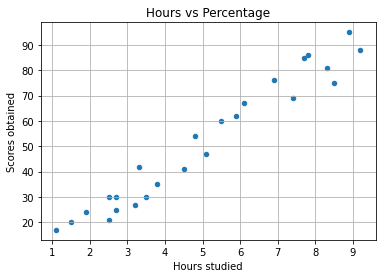

In [29]:
df.plot(kind = 'scatter', x = 'Hours', y = 'Scores', style = 'o')
plt.title("Hours vs Percentage")
plt.xlabel('Hours studied')
plt.ylabel('Scores obtained')
plt.grid()
plt.show()

In [30]:
df.corr(method = 'pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing Data

In [33]:
x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

### Spliting the training and test sets using sklearn's built-in function train_test_split()

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Training the Mode

In [36]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)
print("Training Done")

Training Done


In [37]:
# displaying the regression coefficient and regression intercept
print(reg.coef_)
print(reg.intercept_)
line = reg.coef_*x + reg.intercept_

[9.91065648]
2.018160041434662


# Model Visualization

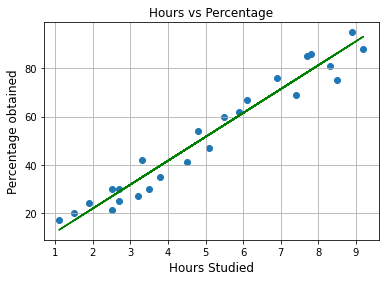

In [38]:
# plot the scatter graph of the model
plt.scatter(x, y)
plt.plot(x, line, color = 'green')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied', fontsize = 12)
plt.ylabel('Percentage obtained', fontsize = 12)
plt.grid()
plt.show()

# Accuracy of the model

In [39]:
print('Test score = ', reg.score(x_test, y_test))
print('Training score = ', reg.score(x_train, y_train))

Test score =  0.9454906892105354
Training score =  0.9515510725211552


# Making Predictions

In [40]:
print(x_test)

# Predicting the scores
y_prediction = reg.predict(x_test)
print(y_prediction)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


# Comparing Actual vs Predicted

In [41]:
comp = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
comp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [43]:
hr = [[9.25]]
our_pred = reg.predict(hr)
print("Number of hours = {}".format(hr[0][0]))
print("Predicted Scores = {}".format(our_pred[0]))

Number of hours = 9.25
Predicted Scores = 93.69173248737539


# Model Evaluation

In [44]:
from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_prediction))

Mean Absolute Error:  4.183859899002982
